<a href="https://colab.research.google.com/github/Suchitra-V31/Machine-learning-projects/blob/main/Calories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
calories=pd.read_csv("/content/calories.csv")

In [ ]:
calories.head()

,User_ID,Calories
0,14733363,231
1,14861698,66
2,11179863,26
3,16180408,71
4,17771927,35


In [ ]:
exercise=pd.read_csv("/content/exercise.csv")

In [ ]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190,94,29,105,40.8
1,14861698,female,20,166,60,14,94,40.3
2,11179863,male,69,179,79,5,88,38.7
3,16180408,female,34,179,71,13,100,40.5
4,17771927,female,27,154,58,10,81,39.8


In [ ]:
calories_data=pd.concat([exercise,calories['Calories']],axis=1)

In [ ]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35


In [ ]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [ ]:
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

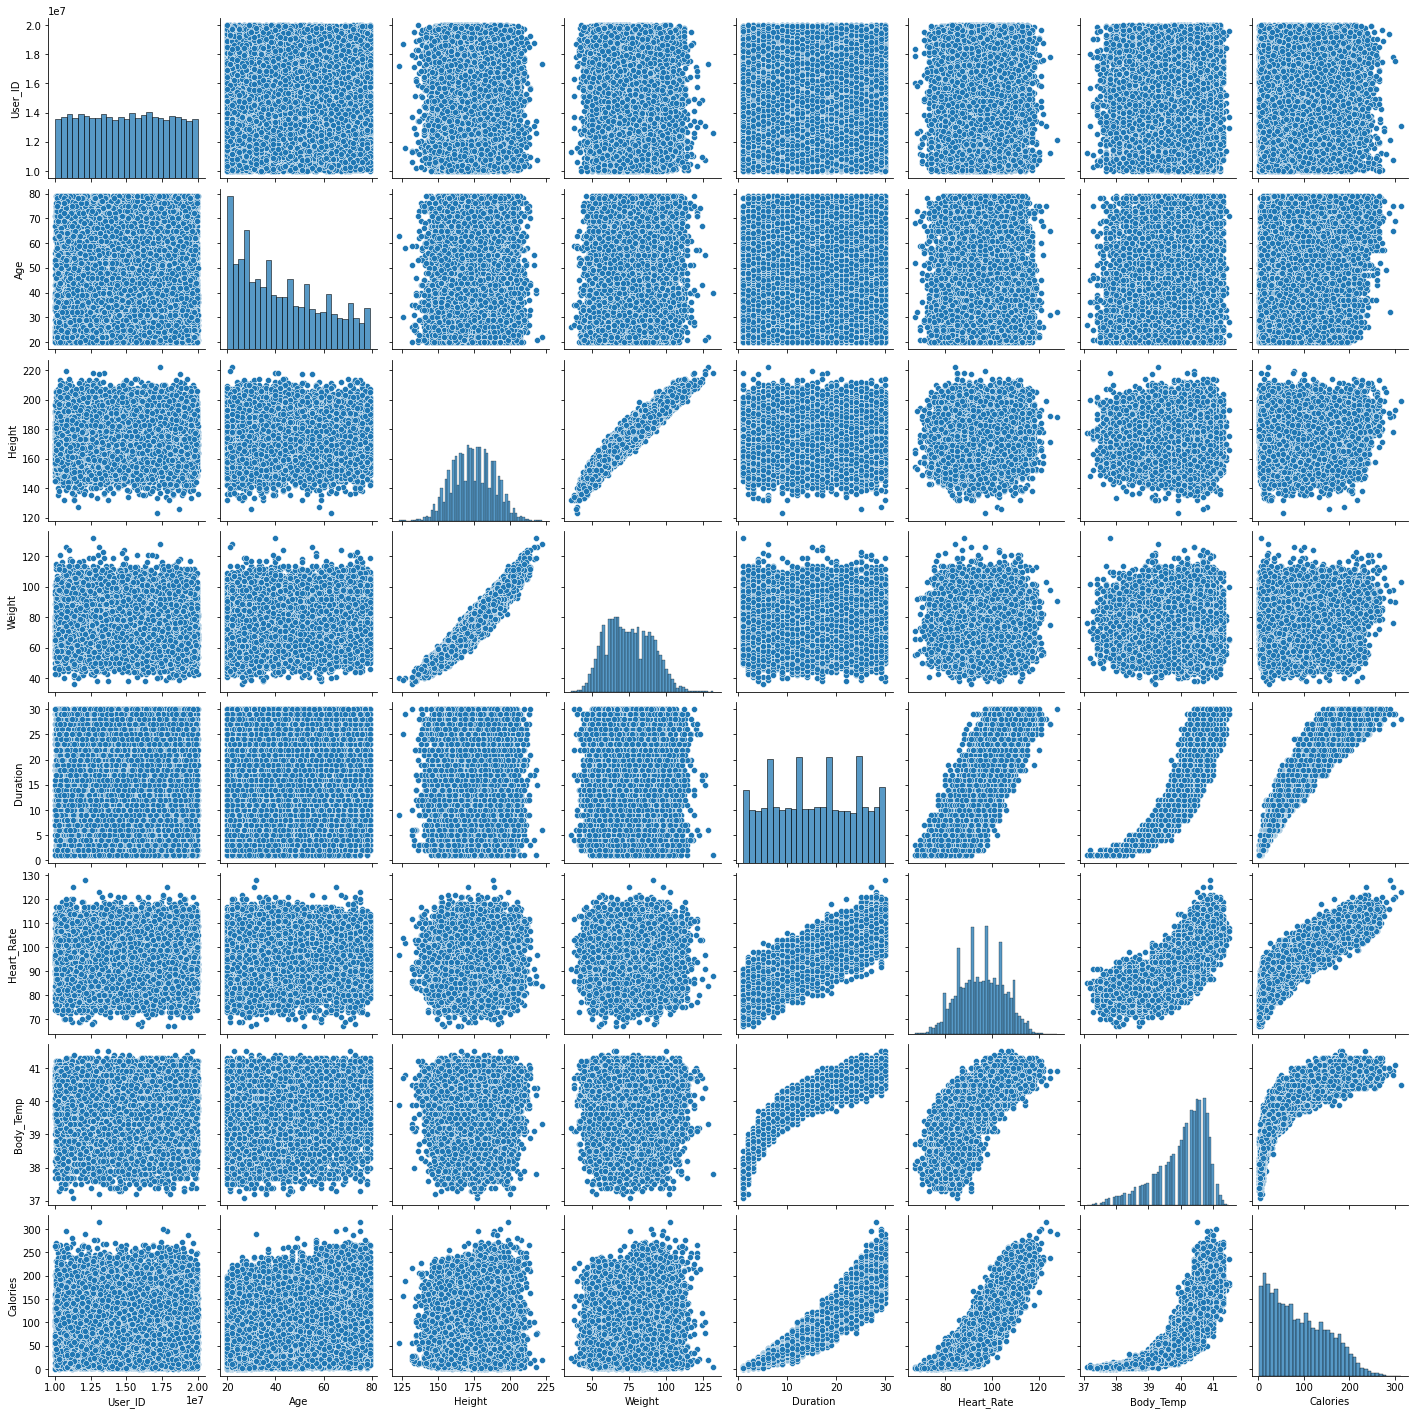

In [ ]:
sns.pairplot(calories_data,palette='plasma')

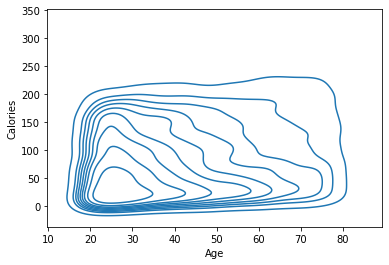

In [ ]:
sns.kdeplot(x=calories_data['Age'],y=calories_data['Calories'])

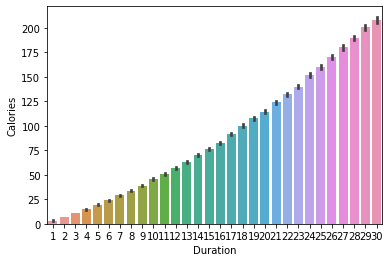

In [ ]:
sns.barplot(x=calories_data['Duration'],y=calories_data['Calories'])

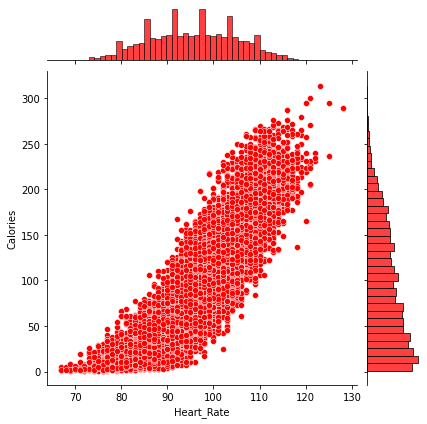

In [ ]:
sns.jointplot(x=calories_data['Heart_Rate'],y=calories_data['Calories'],color='red')

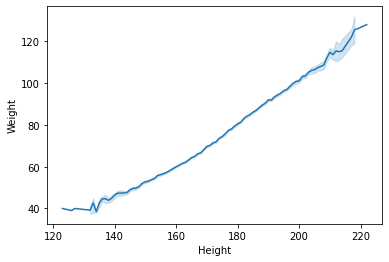

In [ ]:
sns.lineplot(x=calories_data['Height'],y=calories_data['Weight'])

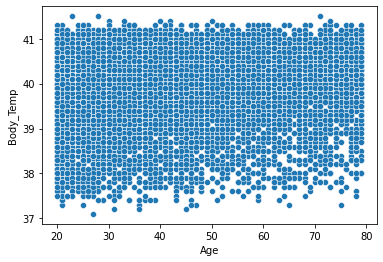

In [ ]:
sns.scatterplot(x=calories_data['Age'],y=calories_data['Body_Temp'])

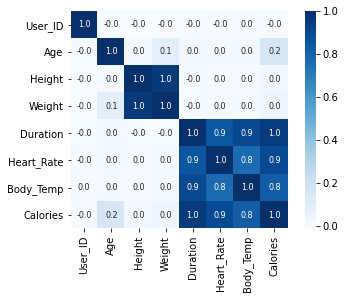

In [ ]:
sns.heatmap(calories_data.corr(),cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


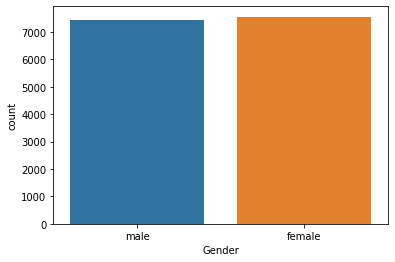

In [ ]:
sns.countplot(calories_data['Gender'])

In [ ]:
calories_data.replace({'Gender':{'male':0,'female':1}},inplace=True)

In [ ]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190,94,29,105,40.8,231
1,14861698,1,20,166,60,14,94,40.3,66
2,11179863,0,69,179,79,5,88,38.7,26
3,16180408,1,34,179,71,13,100,40.5,71
4,17771927,1,27,154,58,10,81,39.8,35


In [ ]:
X=calories_data.drop(columns=['User_ID','Calories'],axis=1)
y=calories_data['Calories']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=102)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
d_tree=DecisionTreeRegressor()

In [ ]:
model=d_tree.fit(X_train,y_train)

In [ ]:
predict=d_tree.predict(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.mean_absolute_error(y_test,predict))
print(MSE(y_test,predict))
print(np.sqrt(MSE(y_test,predict)))


3.4316666666666666
27.639
5.25728066589563


Using XGboost

In [ ]:
import xgboost as xgb

In [ ]:
xg_boost=xgb.XGBRegressor()

In [ ]:
model_1=xg_boost.fit(X_train,y_train)

[13:25:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
predict_1=model_1.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
print(metrics.mean_absolute_error(y_test,predict_1))
print(MSE(y_test,predict_1))
print(np.sqrt(MSE(y_test,predict_1)))



2.7271853182050916
14.052056669833478
3.748607297361712


Using ADABoost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
ada_boost=AdaBoostRegressor()

In [ ]:
model_2=ada_boost.fit(X_train,y_train)

In [ ]:
predict_2=model_2.predict(X_test)

In [ ]:
print(metrics.mean_absolute_error(y_test,predict_2))
print(MSE(y_test,predict_2))
print(np.sqrt(MSE(y_test,predict_2)))

9.614532113783058
145.92875058723865
12.08009729212636
